In [28]:
import pandas as pd
import numpy as np
import my_modules as mm
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

ind = mm.get_ind_returns()
er = mm.annualize_rets(ind['1996':'2000'],12)
cov = ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\Administrator\Investment_management\my_modules.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0,index_col=0,parse_dates=True)/100


In [14]:
from scipy.optimize import minimize
def msr(riskfree_rate, er, cov):
    """
    give best possible return
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    weights_sum_to_1 = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights) -1
    }
    def neg_sharpe_ratio(weights,riskfree_rate,er,cov):
        """
        Returns the negative of the sharpe ratio
        """
        r = mm.portfolio_return(weights, er)
        vol = mm.portfolio_vol(weights,cov)
        return -(r-riskfree_rate)/vol

    
    sharpe = minimize(neg_sharpe_ratio, init_guess,
                      args=(riskfree_rate,er,cov),method = "SLSQP",
                       constraints=(weights_sum_to_1),bounds=bounds)
    return sharpe.x

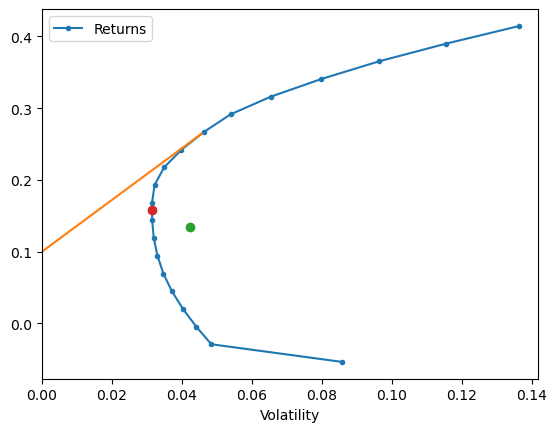

<Axes: xlabel='Volatility'>

In [35]:
mm.plot_ef(20,er,cov,show_cml=True,riskfree_rate=0.1,show_ew=True,show_gmv=True)

In [21]:
l= ["Food","Steel"]
mm.msr(0.1,er[l],cov.loc[l,l])

array([0.75040363, 0.24959637])

In [24]:
mm.msr(0.1,np.array([0.11,0.12]),cov.loc[l,l])

array([0.57930354, 0.42069646])